In [1]:
import pandas as pd
import sys
sys.path.append("../")
import macrophages_analysis
import os
import matplotlib.pyplot as plt

## Data import

In [2]:
preprocessed_data_path = '../../20x_datasets/Preprocessed_data/'

# make merged CD86+CD206 datasets
nucleus_dataset_p4g4_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset.csv')
nucleus_dataset_p4g4_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset.csv')
nucleus_dataset_p4g4 = nucleus_dataset_p4g4_206.merge(nucleus_dataset_p4g4_86, how='outer')

nucleus_dataset_smooth_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_Smooth_nucleus_dataset.csv')
nucleus_dataset_smooth_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset.csv')
nucleus_dataset_smooth = nucleus_dataset_smooth_206.merge(nucleus_dataset_smooth_86, how='outer')

nucleus_dataset_tcps_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset.csv')
nucleus_dataset_tcps_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset.csv')
nucleus_dataset_tcps = nucleus_dataset_tcps_206.merge(nucleus_dataset_tcps_86, how='outer')

# 20x CD86+CD206 P4G4 nucleus data
## 20x_CD86+CD206_P4G4_all_features

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8907502799552072
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8987359024645573
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8909459404160763


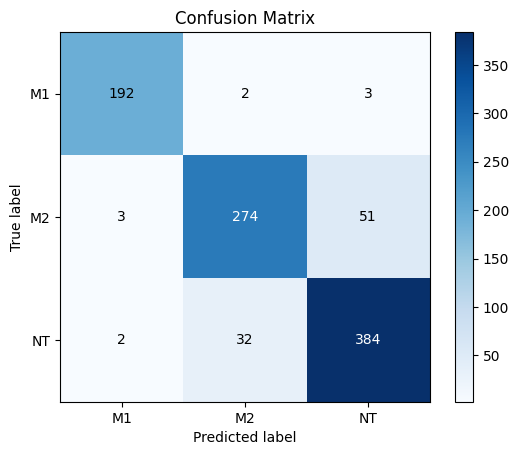

In [3]:
pipe_p4g4, test_data_p4g4 = macrophages_analysis.make_nucleus_classifier(nucleus_dataset_p4g4, confusion_matrix=True)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9994420326342864
AUC score for M2 0.9713067618481064
AUC score for NT 0.9741490088858511
Average AUC 0.981632601122748


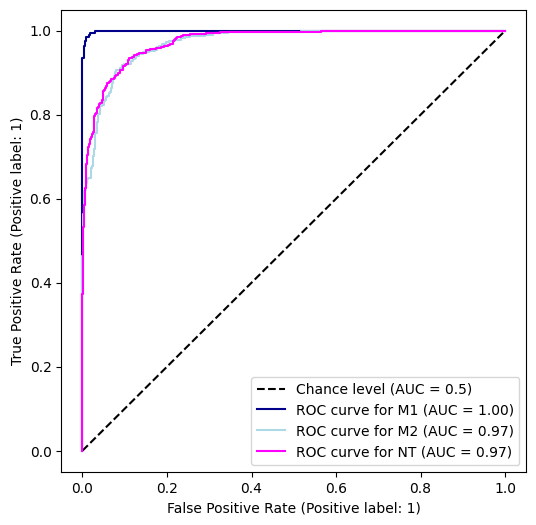

In [4]:
macrophages_analysis.make_multiclass_roc(pipe_p4g4, test_data_p4g4)

## Get the most important features

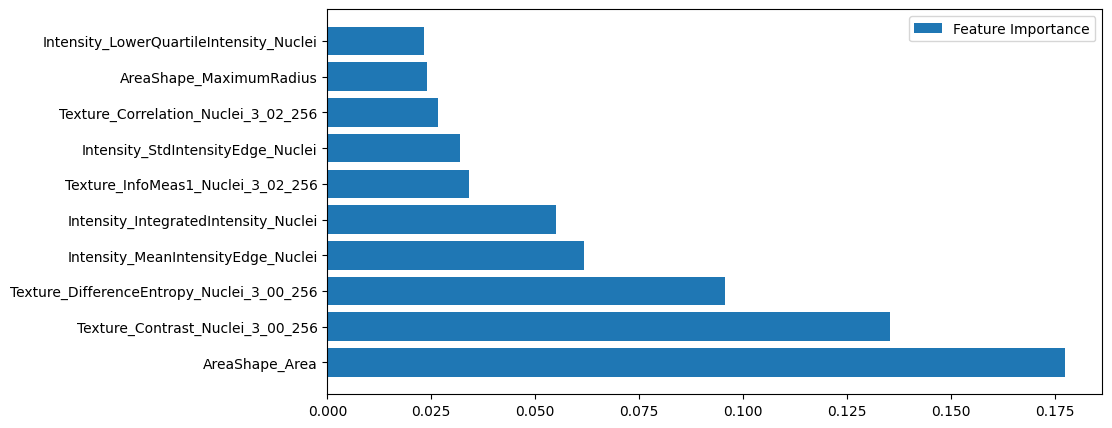

In [5]:
important_features_smooth = macrophages_analysis.get_best_features(pipe_p4g4, nucleus_dataset_p4g4.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features_smooth['Feature'], important_features_smooth['Importance'], label='Feature Importance')
ax.legend()

# 20x CD86+CD206 Smooth nucleus data
## 20x_CD86+CD206_Smooth_all_features

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8480433632998412
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8458050216274277
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.848265414362982


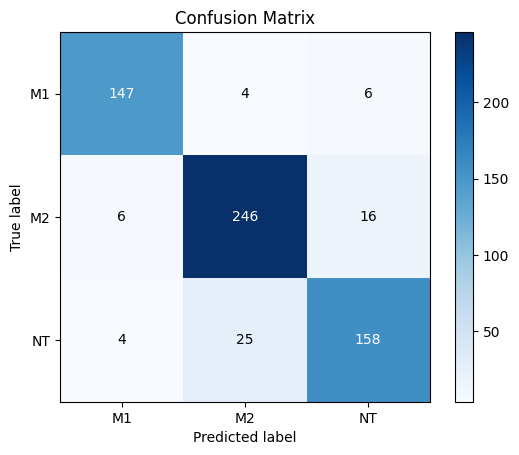

In [6]:
pipe_smooth, test_data_smooth = macrophages_analysis.make_nucleus_classifier(nucleus_dataset_smooth, confusion_matrix=True)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9888989990900818
AUC score for M2 0.9803345192641444
AUC score for NT 0.9792765020446682
Average AUC 0.9828366734662981


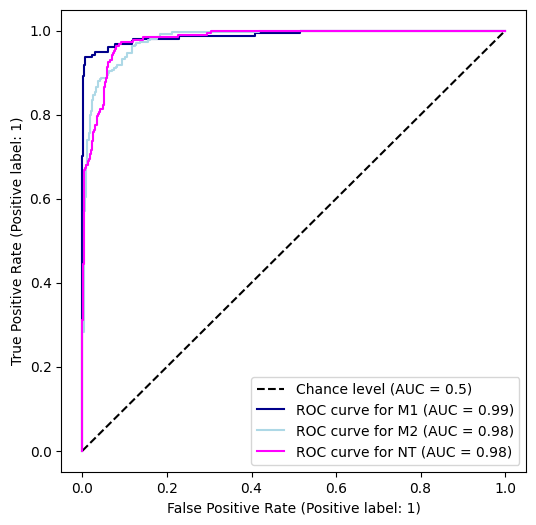

In [7]:
macrophages_analysis.make_multiclass_roc(pipe_smooth, test_data_smooth)

## Get the most important features

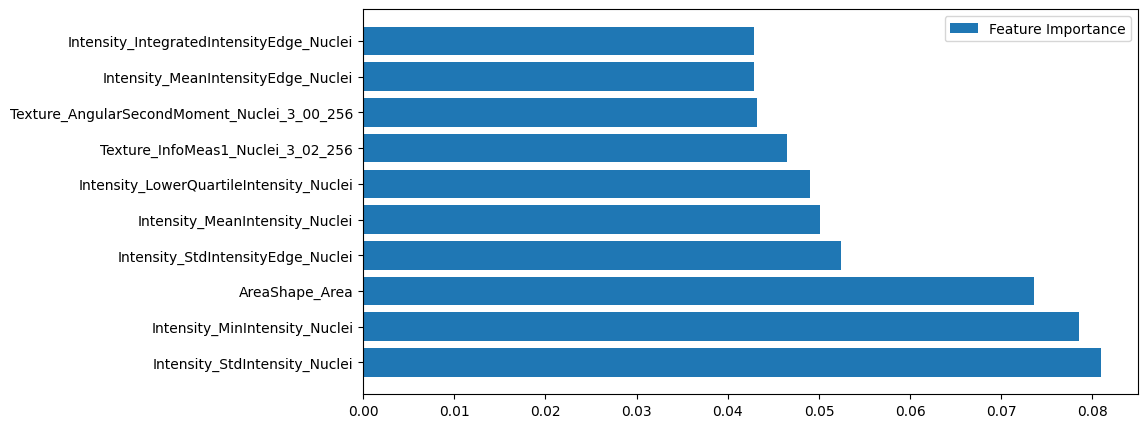

In [8]:
important_features_smooth = macrophages_analysis.get_best_features(pipe_smooth, nucleus_dataset_smooth.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features_smooth['Feature'], important_features_smooth['Importance'], label='Feature Importance')
ax.legend()

# 20x CD86+CD206 TCPS nucleus data
## 20x_CD86+CD206_TCPS_all_features

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8718947368421054
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8843604630494626
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8717095363319733


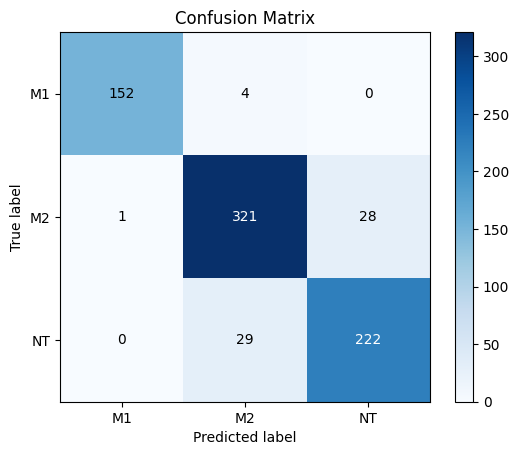

In [9]:
pipe_tcps, test_data_tcps = macrophages_analysis.make_nucleus_classifier(nucleus_dataset_tcps, confusion_matrix=True)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9995520286701651
AUC score for M2 0.9795787995787996
AUC score for NT 0.9822528069540022
Average AUC 0.9871278784009889


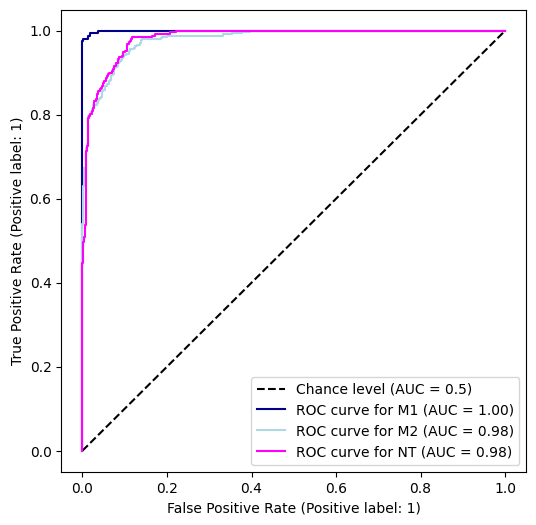

In [10]:
macrophages_analysis.make_multiclass_roc(pipe_tcps, test_data_tcps)

## Get the most important features

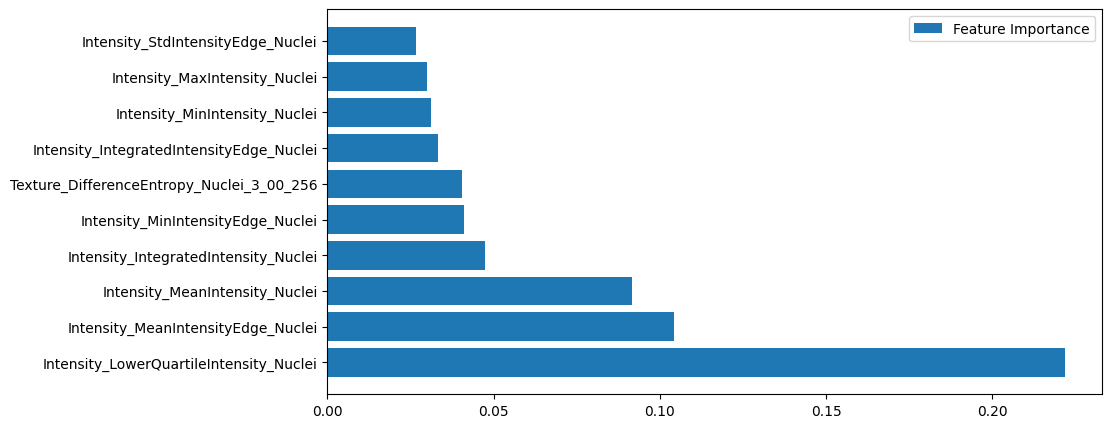

In [11]:
important_features_tcps = macrophages_analysis.get_best_features(pipe_tcps, nucleus_dataset_tcps.drop('CellType', axis=1), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(important_features_tcps['Feature'], important_features_tcps['Importance'], label='Feature Importance')
ax.legend()